In [9]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [10]:
from tensorflow.keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.layers import Embedding

max_features = 10000
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, 
                    batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 28s 164ms/step - loss: 0.6074 - acc: 0.6568 - val_loss: 0.4506 - val_acc: 0.8188
Epoch 2/10
157/157 [==============================] - 26s 168ms/step - loss: 0.3703 - acc: 0.8490 - val_loss: 0.3487 - val_acc: 0.8542
Epoch 3/10
157/157 [==============================] - 26s 169ms/step - loss: 0.2845 - acc: 0.8884 - val_loss: 0.3157 - val_acc: 0.8684
Epoch 4/10
157/157 [==============================] - 26s 169ms/step - loss: 0.2386 - acc: 0.9088 - val_loss: 0.3577 - val_acc: 0.8588
Epoch 5/10
157/157 [==============================] - 26s 168ms/step - loss: 0.2104 - acc: 0.9223 - val_loss: 0.5167 - val_acc: 0.8388
Epoch 6/10
157/157 [==============================] - 27s 173ms/step - loss: 0.1888 - acc: 0.9320 - val_loss: 0.3245 - val_acc: 0.8734
Epoch 7/10
157/157 [==============================] - 30s 188ms/step - loss: 0.1668 - acc: 0.9387 - val_loss: 0.3152 - val_acc: 0.8854
Epoch 8/10
157/157 [==============================] - 2

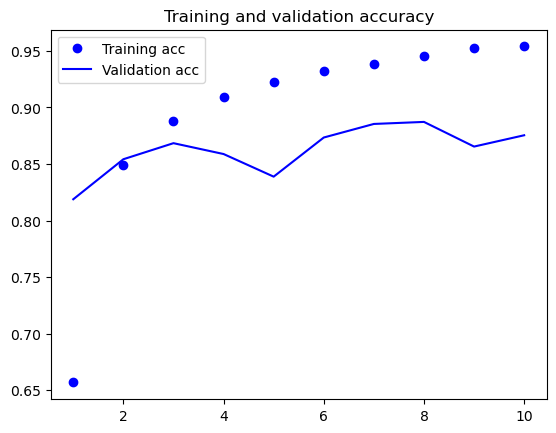

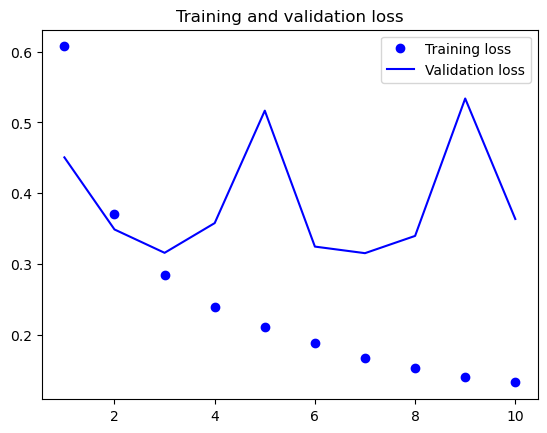

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()